In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fft, interpolate

In [2]:
# iterative cooley tukey fft
def cooley_tukey_fft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if np.log2(N) % 1 > 0:
        raise ValueError("must be a power of 2")
        
    N_min = min(N, 2)
    
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))
    
    while X.shape[0] < N:
        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        terms = np.exp(-1j * np.pi * np.arange(X.shape[0]) / X.shape[0])[:, None]
        X = np.vstack([X_even + terms * X_odd, X_even - terms * X_odd])
    
    return X.ravel()

# recursive iteration fft
def recursive_fft(x):
    N = len(x)
    if N <= 1: return x
    even = recursive_fft(x[0::2])
    odd =  recursive_fft(x[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]

# read raw data
def read_data(filename):
    result = []  
    with open(filename,'r') as file:  
        csvReader=csv.reader(file)  
        for line in csvReader:
            result.append(float(line[0]))
    return result

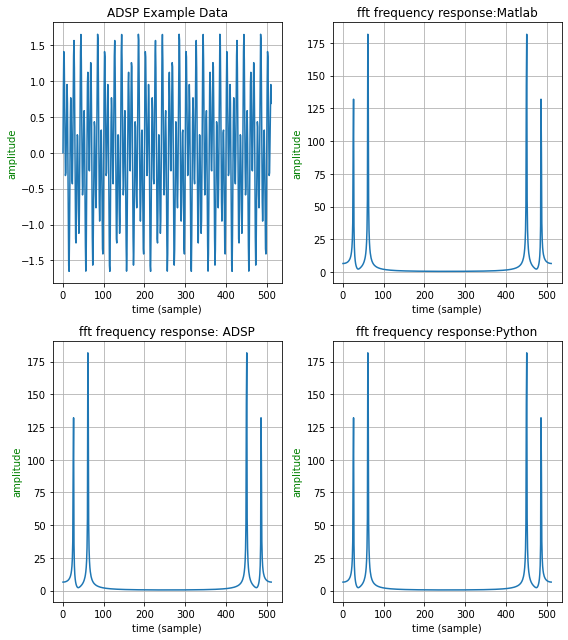

In [3]:
# we need imaginary part in time domain while ADSP is processing
# but remobe imaginary part of data now
# so we can analysis 
dataSet0 = read_data("fft_data/inputcomplx512.dat")
dataSet0 = dataSet0[0::2]
x_axis0 = np.arange(len(dataSet0))

dataSet1 = read_data("fft_data/FFT512complx_ADSP0407.dat")
x_axis1 = np.arange(len(dataSet1)//2)
complx1 = np.zeros(len(dataSet1)//2, complex)
complx1.real = dataSet1[1::2]
complx1.imag = dataSet1[0::2]

dataSet2 = read_data("fft_data/FFT512complx_Matlab.dat")
x_axis2 = np.arange(len(dataSet2)//2)
complx2 = np.zeros(len(dataSet2)//2, complex)
complx2.real = dataSet2[1::2]
complx2.imag = dataSet2[0::2]

dataSet3 = cooley_tukey_fft(dataSet0)
x_axis3 = np.arange(len(dataSet3))

fig, axes = plt.subplots(2, 2, figsize=(8, 9))

axes[0][0].plot(x_axis0, dataSet0)
axes[0][0].set_title('ADSP Example Data')
axes[0][0].set_xlabel('time (sample)')
axes[0][0].set_ylabel('amplitude', color='g')
axes[0][0].grid()

axes[1][0].plot(x_axis1, abs(complx1))
axes[1][0].set_title('fft frequency response: ADSP')
axes[1][0].set_xlabel('time (sample)')
axes[1][0].set_ylabel('amplitude', color='g')
axes[1][0].grid()

axes[0][1].plot(x_axis2, abs(complx2))
axes[0][1].set_title('fft frequency response:Matlab')
axes[0][1].set_xlabel('time (sample)')
axes[0][1].set_ylabel('amplitude', color='g')
axes[0][1].grid()

axes[1][1].plot(x_axis3, abs(dataSet3))
axes[1][1].set_title('fft frequency response:Python')
axes[1][1].set_xlabel('time (sample)')
axes[1][1].set_ylabel('amplitude', color='g')
axes[1][1].grid()

plt.tight_layout()
plt.show()

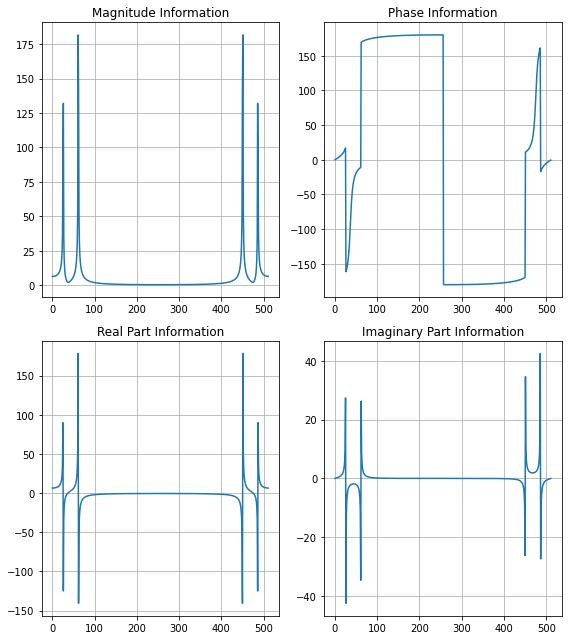

In [4]:
x_axis = np.arange(len(dataSet1)//2)

y_axis_phase = np.zeros(len(dataSet1)//2)
y_axis_magnitude = np.zeros(len(dataSet1)//2)

Im = np.zeros(len(dataSet1)//2)
Re = np.zeros(len(dataSet1)//2)

for index, element in enumerate(dataSet1):
    if index % 2 == 1:
        Im[(index-1)//2] = element
    else:
        Re[(index)//2] = element

for i in range(len(dataSet1)//2):
    y_axis_phase[i] = np.arctan2(Im[i], Re[i])*180/np.pi
    y_axis_magnitude[i] = np.sqrt(np.power(Im[i],2)+np.power(Re[i],2))
    
    
fig, axes = plt.subplots(2, 2, figsize=(8, 9))

axes[0][0].plot(x_axis, y_axis_magnitude)
axes[0][0].set_title('Magnitude Information')
axes[0][0].grid()

axes[0][1].plot(x_axis, y_axis_phase)
axes[0][1].set_title('Phase Information')
axes[0][1].grid()

axes[1][0].plot(x_axis, Re)
axes[1][0].set_title('Real Part Information')
axes[1][0].grid()

axes[1][1].plot(x_axis, Im)
axes[1][1].set_title('Imaginary Part Information')
axes[1][1].grid()


plt.tight_layout()
plt.show()